In [3]:
# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause

from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

# For nice Plots
%matplotlib inline
plt.style.use('default')

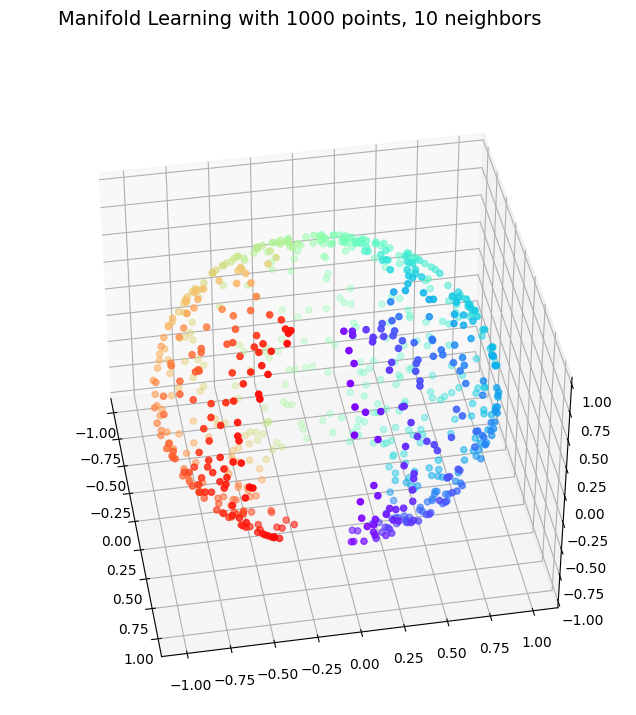

In [4]:
# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

standard: 0.12 sec
ltsa: 0.4 sec
hessian: 0.25 sec
modified: 0.19 sec
ISO: 0.3 sec
MDS: 0.98 sec
Spectral Embedding: 0.12 sec
t-SNE: 2.1 sec


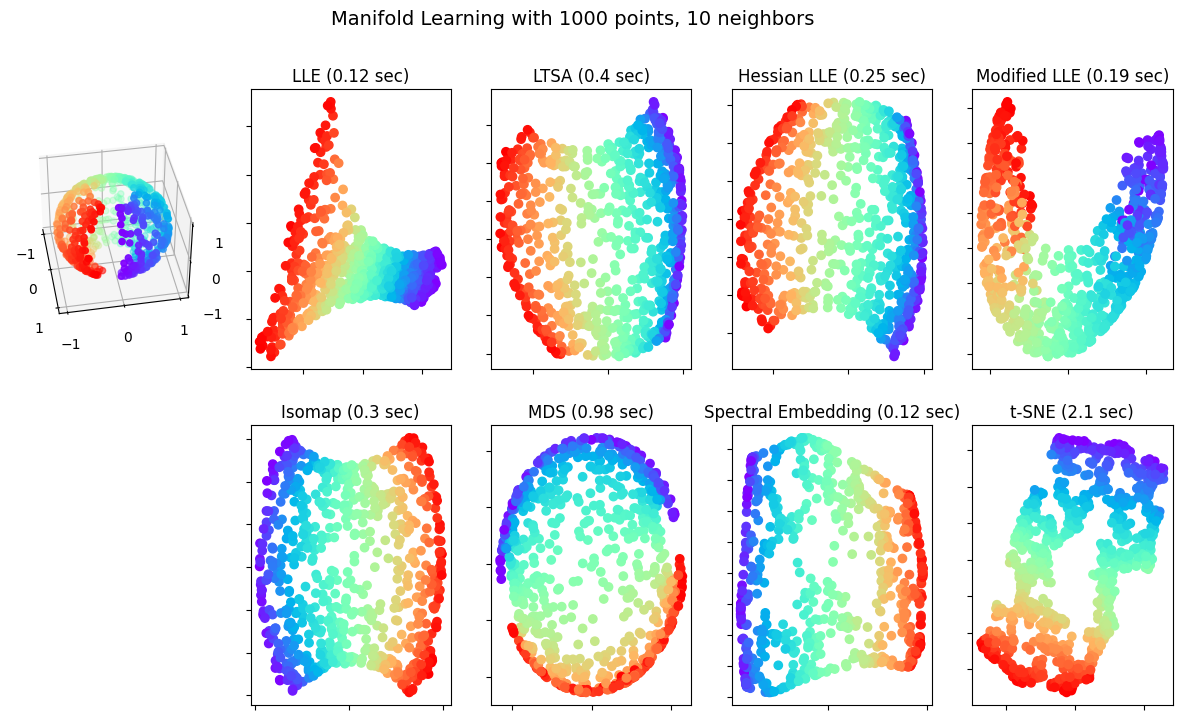

In [5]:

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method
        )
        .fit_transform(sphere_data)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")

# Perform Isomap Manifold learning.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2, n_neighbors=n_neighbors)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()

[[0, 5471.52, 5091.57, 5392.82, 5416.45, 4584.33, 4904.83, 3851.73], [5471.52, 0, 1315.28, 927.35, 1505.11, 944.4, 1157.42, 1945.42], [5091.57, 1315.28, 0, 2166.0, 2724.01, 1571.76, 293.52, 1240.77], [5392.82, 927.35, 2166.0, 0, 577.85, 973.23, 1947.28, 2422.32], [5416.45, 1505.11, 2724.01, 577.85, 0, 1366.63, 2490.97, 2838.62], [4584.33, 944.4, 1571.76, 973.23, 1366.63, 0, 1290.15, 1474.26], [4904.83, 1157.42, 293.52, 1947.28, 2490.97, 1290.15, 0, 1064.41], [3851.73, 1945.42, 1240.77, 2422.32, 2838.62, 1474.26, 1064.41, 0]]
t-SNE: 0.26 sec


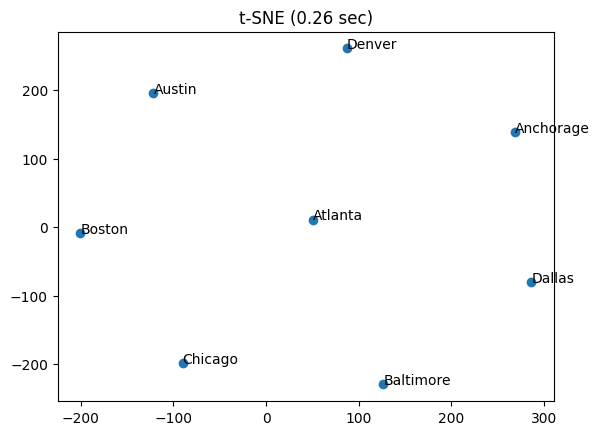

In [31]:
names = ['Anchorage',	'Atlanta',	'Austin',	'Baltimore',	'Boston',	'Chicago',	'Dallas',	'Denver']

D = [
  [	0, 	5471.52,	5091.57,	5392.82,	5416.45,	4584.33,	4904.83,	3851.73],
  [	5471.52,	0,	1315.28,	927.35,	1505.11,	944.40,	1157.42,	1945.42],
  [	5091.57,	1315.28,	0,	2166.00,	2724.01,	1571.76,	293.52,	1240.77],
  [	5392.82,	927.35,	2166.00,	0,	577.85,	973.23,	1947.28,	2422.32],
  [	5416.45,	1505.11,	2724.01,	577.85,	0,	1366.63,	2490.97,	2838.62],
  [	4584.33,	944.40,	1571.76,	973.23,	1366.63,	0,	1290.15,	1474.26	],
  [	4904.83,	1157.42,	293.52,	1947.28,	2490.97,	1290.15,	0,	1064.41],
  [	3851.73,	1945.42,	1240.77,	2422.32,	2838.62,	1474.26,	1064.41,	0]
  ]
print(D)
  
# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=1)
trans_data = tsne.fit_transform(D).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

fig, ax = plt.subplots()
plt.scatter(trans_data[0], trans_data[1])
plt.title("t-SNE (%.2g sec)" % (t1 - t0))

for i in range(len(names)):
    ax.annotate(names[i], (trans_data[0][i], trans_data[1][i]))


plt.show()

[[0, 5471.52, 5091.57, 5392.82, 5416.45, 4584.33, 4904.83, 3851.73], [5471.52, 0, 1315.28, 927.35, 1505.11, 944.4, 1157.42, 1945.42], [5091.57, 1315.28, 0, 2166.0, 2724.01, 1571.76, 293.52, 1240.77], [5392.82, 927.35, 2166.0, 0, 577.85, 973.23, 1947.28, 2422.32], [5416.45, 1505.11, 2724.01, 577.85, 0, 1366.63, 2490.97, 2838.62], [4584.33, 944.4, 1571.76, 973.23, 1366.63, 0, 1290.15, 1474.26], [4904.83, 1157.42, 293.52, 1947.28, 2490.97, 1290.15, 0, 1064.41], [3851.73, 1945.42, 1240.77, 2422.32, 2838.62, 1474.26, 1064.41, 0]]
t-SNE: 0.005 sec


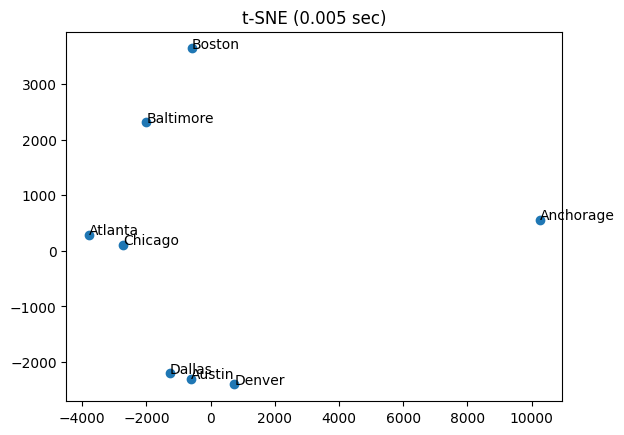

In [28]:
names = ['Anchorage',	'Atlanta',	'Austin',	'Baltimore',	'Boston',	'Chicago',	'Dallas',	'Denver']

D = [
  [	0, 	5471.52,	5091.57,	5392.82,	5416.45,	4584.33,	4904.83,	3851.73],
  [	5471.52,	0,	1315.28,	927.35,	1505.11,	944.40,	1157.42,	1945.42],
  [	5091.57,	1315.28,	0,	2166.00,	2724.01,	1571.76,	293.52,	1240.77],
  [	5392.82,	927.35,	2166.00,	0,	577.85,	973.23,	1947.28,	2422.32],
  [	5416.45,	1505.11,	2724.01,	577.85,	0,	1366.63,	2490.97,	2838.62],
  [	4584.33,	944.40,	1571.76,	973.23,	1366.63,	0,	1290.15,	1474.26	],
  [	4904.83,	1157.42,	293.52,	1947.28,	2490.97,	1290.15,	0,	1064.41],
  [	3851.73,	1945.42,	1240.77,	2422.32,	2838.62,	1474.26,	1064.41,	0]
  ]
print(D)
  
# Perform t-distributed stochastic neighbor embedding.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=3, n_components=2)
    .fit_transform(D)
    .T
)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

fig, ax = plt.subplots()
plt.scatter(trans_data[0], trans_data[1])
plt.title("t-SNE (%.2g sec)" % (t1 - t0))

for i in range(len(names)):
    ax.annotate(names[i], (trans_data[0][i], trans_data[1][i]))


plt.show()